<h1><center> 
    Neural network design and application
</center></h1>

<h2><center>CPT_S 434/534, 2022 Spring</center></h2>

<h2><center>HW 2: NN basics -- Part 2 (68 pts)</center></h2>

### Name: *[INPUT YOUR NAME HERE]*

## This assignment includes:

## Coding in Python (pytorch): train softmax classifiers on MNIST (68 points)

Step 0: Install and configure: python ([Anaconda platform](https://docs.anaconda.com/anaconda/install/) recommended), [Jupyter Notebook](https://jupyter.org/install) and [pytorch](https://pytorch.org/get-started/) 

**Remark 1.** [Colab](https://colab.research.google.com) is a cloud platform that enables your Jupyter Notebooks (including this .ipynb assignment) to run with different runtime types (hardware acceleration is possible using GPU or TPU). You may also choose Colab to finish assignments (future assignments may require extensive computation that may be time-consuming on your laptop). 

**Remark 2.** If you use Colab, it is still required to convert your .ipynb to .html and submit **BOTH** files to Canvas. See [this page](https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab) on how to convert to .html

Step 1: Read provided code (with pytorch) to understand the logic of MLP with one hidden layer, so that you know how to implement in the following step and how to re-use the provided code

Step 2: Complete the code of MLP with two hidden layer of softmax classifier on [MNIST](http://yann.lecun.com/exdb/mnist/) using different hyper-parameters.

Step 3: Record and plot results to show accuracy convergence (against #epoch)

## Submission:

* Convert the .ipynb file to .html file (**save the execution outputs** to show your progress: otherwise grading may be affected)
    
* Upload **both** your .ipynb and .html files to Canvas.

* Deadline: Feb 20, 11:59 PM, Pacific time.

* Plots should be clear and easy to read.

## 1. (Read and run) Train feedforward networks with one hidden layer (one activation layer)

In [24]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy

# Device configuration: check if there is a configured GPU available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784        # 28 * 28
hidden_size = 500       # the output dimension of the linear model in each MLP hidden layer
num_classes = 10        # the number of classes
num_epochs = 10         # the number of epochs (each epoch: scanning the entire training set)
batch_size = 100        # how many samples are used in each iteration of SGD/Adam update
learning_rate = 0.001   # learning rate or step size used in gradient-based optimization algorithm

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define a model using class NeuralNet()
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Define loss function and optimization algorithm (optimizer)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.00001)  

# Train the model
# train_acc_list, test_acc_list = [],[]
total_step = len(train_loader)
test_acc_list, train_acc_list = [], []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Test the model and plot training/testing accuracy
    # In test phase, we don't need to compute gradients 
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
        test_acc_list.append(100 * correct / total)

        
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the training images: {} %'.format(100 * correct / total))
        train_acc_list.append(100 * correct / total)
            
plt.plot(train_acc_list, '-b', label='train acc')
plt.plot(test_acc_list, '-r', label='test acc')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(rotation=60)
plt.title('Accuracy ~ Epoch')
# plt.savefig('assets/accr_{}.png'.format(cfg_idx))
plt.show()
        
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/10], Step [100/600], Loss: 0.3749
Epoch [1/10], Step [200/600], Loss: 0.3057
Epoch [1/10], Step [300/600], Loss: 0.2196
Epoch [1/10], Step [400/600], Loss: 0.2531
Epoch [1/10], Step [500/600], Loss: 0.1284
Epoch [1/10], Step [600/600], Loss: 0.1479
Accuracy of the network on the 10000 test images: 95.47 %


KeyboardInterrupt: 

## 2. (To finish, 17 pts) Implement and train a feedforward network with two hidden layers (one hidden layer means [one linear layer + one nonlinear activation function layer], so make sure you have two activation layers)

After training: plot training and testing accuracy (against #epoches) 

Hint: modify class NeuralNet

In [18]:
# Your code goes here
# 
# Hint: no need to implement the entire training process as in HW1. 
# Simply modify the above provided code, particularly "class NeuralNet()".
# For example, copy the above "class NeuralNet()" in this cell,
# and modify the functions "__initi__()" and "forward()" to re-define its structure.
# After modifying "class NeuralNet()", copy all necessary code to train on your code,
# including: define a model from class NeuralNet, define loss function and optimizer,
# training for-loops and plot figures
# 
# 

def train(model, optimizer, message = ""):
    print("=========================================================")
    print(message)
    # Define loss function and optimization algorithm (optimizer)
    criterion = nn.CrossEntropyLoss()

    # Train the model
    # train_acc_list, test_acc_list = [],[]
    total_step = len(train_loader)
    test_acc_list, train_acc_list = [], []
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):  
            # Move tensors to the configured device
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

        # Test the model and plot training/testing accuracy
        # In test phase, we don't need to compute gradients 
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.reshape(-1, 28*28).to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
            test_acc_list.append(100 * correct / total)

            
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in train_loader:
                images = images.reshape(-1, 28*28).to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            print('Accuracy of the network on the training images: {} %'.format(100 * correct / total))
            train_acc_list.append(100 * correct / total)
                
    plt.plot(train_acc_list, '-b', label='train acc')
    plt.plot(test_acc_list, '-r', label='test acc')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Accuracy ~ Epoch')
    # plt.savefig('assets/accr_{}.png'.format(cfg_idx))
    plt.show()
            
    # Save the model checkpoint
    torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/10], Step [100/600], Loss: 0.4562
Epoch [1/10], Step [200/600], Loss: 0.2449
Epoch [1/10], Step [300/600], Loss: 0.2206
Epoch [1/10], Step [400/600], Loss: 0.1959
Epoch [1/10], Step [500/600], Loss: 0.2556
Epoch [1/10], Step [600/600], Loss: 0.2074
Accuracy of the network on the 10000 test images: 95.8 %
Accuracy of the network on the training images: 96.17333333333333 %
Epoch [2/10], Step [100/600], Loss: 0.1334
Epoch [2/10], Step [200/600], Loss: 0.0973
Epoch [2/10], Step [300/600], Loss: 0.1246
Epoch [2/10], Step [400/600], Loss: 0.0932
Epoch [2/10], Step [500/600], Loss: 0.0488
Epoch [2/10], Step [600/600], Loss: 0.0514
Accuracy of the network on the 10000 test images: 97.32 %
Accuracy of the network on the training images: 98.05333333333333 %
Epoch [3/10], Step [100/600], Loss: 0.0605
Epoch [3/10], Step [200/600], Loss: 0.1096
Epoch [3/10], Step [300/600], Loss: 0.0272
Epoch [3/10], Step [400/600], Loss: 0.0128
Epoch [3/10], Step [500/600], Loss: 0.1576
Epoch [3/10], Step

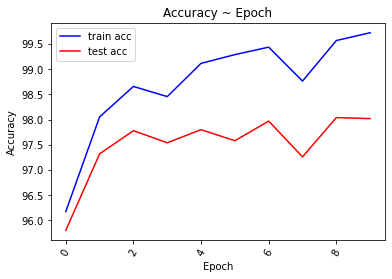

In [11]:
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.fc3 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        out = self.fc3(out)
        return out

nn2 = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.Adam(nn2.parameters(), lr=learning_rate, weight_decay=0.00001) 
train(nn2, optimizer)

## 3. (To finish, 3 pts) Use SGD (instead of Adam) to train your two-hidden-layer network

Hint: read [this document](https://pytorch.org/docs/stable/optim.html) for torch.optim and take a look at their *example* to understand how to change optimization algorithm. Hyper-parameters of optimization can be the same with the provided code

Epoch [1/10], Step [100/600], Loss: 0.2177
Epoch [1/10], Step [200/600], Loss: 0.2555
Epoch [1/10], Step [300/600], Loss: 0.1869
Epoch [1/10], Step [400/600], Loss: 0.2419
Epoch [1/10], Step [500/600], Loss: 0.4339
Epoch [1/10], Step [600/600], Loss: 0.3281
Accuracy of the network on the 10000 test images: 91.88 %
Accuracy of the network on the training images: 91.9 %
Epoch [2/10], Step [100/600], Loss: 0.2108
Epoch [2/10], Step [200/600], Loss: 0.2531
Epoch [2/10], Step [300/600], Loss: 0.3540
Epoch [2/10], Step [400/600], Loss: 0.2022
Epoch [2/10], Step [500/600], Loss: 0.2102
Epoch [2/10], Step [600/600], Loss: 0.2507
Accuracy of the network on the 10000 test images: 91.95 %
Accuracy of the network on the training images: 91.92666666666666 %
Epoch [3/10], Step [100/600], Loss: 0.2534
Epoch [3/10], Step [200/600], Loss: 0.1990
Epoch [3/10], Step [300/600], Loss: 0.3335
Epoch [3/10], Step [400/600], Loss: 0.2385
Epoch [3/10], Step [500/600], Loss: 0.2247
Epoch [3/10], Step [600/600], 

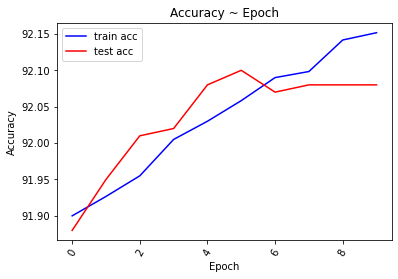

In [15]:
# Your code goes here
optimizer = torch.optim.SGD(nn2.parameters(), lr=learning_rate, weight_decay=0.00001) 
train(nn2, optimizer)

## 4. (To finish, 3 pts each setting, 15 pts in total) Use SGD to train your two-hidden-layer network with different learning rate values in the range of $\{ 0.0001, 0.001, 0.01, 0.1, 1 \}$, and show which learning rate achieves the best testing accuracy.

learning rate: 0.0001
Epoch [1/10], Step [100/600], Loss: 0.1114
Epoch [1/10], Step [200/600], Loss: 0.1189
Epoch [1/10], Step [300/600], Loss: 0.1060
Epoch [1/10], Step [400/600], Loss: 0.1149
Epoch [1/10], Step [500/600], Loss: 0.1309
Epoch [1/10], Step [600/600], Loss: 0.0681
Accuracy of the network on the 10000 test images: 95.52 %
Accuracy of the network on the training images: 95.885 %
Epoch [2/10], Step [100/600], Loss: 0.1088
Epoch [2/10], Step [200/600], Loss: 0.1507
Epoch [2/10], Step [300/600], Loss: 0.0744
Epoch [2/10], Step [400/600], Loss: 0.0415
Epoch [2/10], Step [500/600], Loss: 0.1652
Epoch [2/10], Step [600/600], Loss: 0.2466
Accuracy of the network on the 10000 test images: 95.57 %
Accuracy of the network on the training images: 95.90666666666667 %
Epoch [3/10], Step [100/600], Loss: 0.1407
Epoch [3/10], Step [200/600], Loss: 0.1396
Epoch [3/10], Step [300/600], Loss: 0.1926
Epoch [3/10], Step [400/600], Loss: 0.1188
Epoch [3/10], Step [500/600], Loss: 0.1051
Epoch 

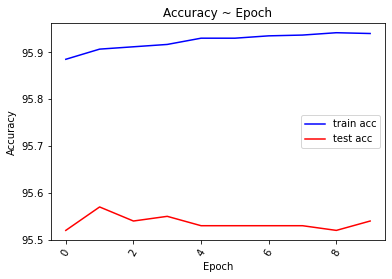

learning rate: 0.001
Epoch [1/10], Step [100/600], Loss: 0.1506
Epoch [1/10], Step [200/600], Loss: 0.1996
Epoch [1/10], Step [300/600], Loss: 0.1788
Epoch [1/10], Step [400/600], Loss: 0.0873
Epoch [1/10], Step [500/600], Loss: 0.2375
Epoch [1/10], Step [600/600], Loss: 0.1449
Accuracy of the network on the 10000 test images: 95.58 %
Accuracy of the network on the training images: 95.97833333333334 %
Epoch [2/10], Step [100/600], Loss: 0.1221
Epoch [2/10], Step [200/600], Loss: 0.2325
Epoch [2/10], Step [300/600], Loss: 0.0745
Epoch [2/10], Step [400/600], Loss: 0.0869
Epoch [2/10], Step [500/600], Loss: 0.1192
Epoch [2/10], Step [600/600], Loss: 0.0977
Accuracy of the network on the 10000 test images: 95.57 %
Accuracy of the network on the training images: 95.98166666666667 %
Epoch [3/10], Step [100/600], Loss: 0.1377
Epoch [3/10], Step [200/600], Loss: 0.1782
Epoch [3/10], Step [300/600], Loss: 0.0819
Epoch [3/10], Step [400/600], Loss: 0.1828
Epoch [3/10], Step [500/600], Loss: 0.2

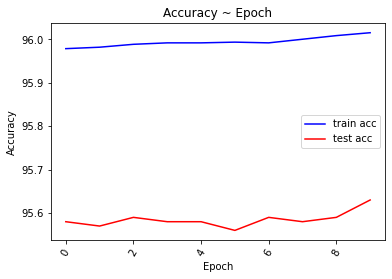

learning rate: 0.01
Epoch [1/10], Step [100/600], Loss: 0.0721
Epoch [1/10], Step [200/600], Loss: 0.0880
Epoch [1/10], Step [300/600], Loss: 0.2536
Epoch [1/10], Step [400/600], Loss: 0.2534
Epoch [1/10], Step [500/600], Loss: 0.0822
Epoch [1/10], Step [600/600], Loss: 0.1787
Accuracy of the network on the 10000 test images: 95.64 %
Accuracy of the network on the training images: 96.06 %
Epoch [2/10], Step [100/600], Loss: 0.0529
Epoch [2/10], Step [200/600], Loss: 0.1051
Epoch [2/10], Step [300/600], Loss: 0.1433
Epoch [2/10], Step [400/600], Loss: 0.1519
Epoch [2/10], Step [500/600], Loss: 0.1717
Epoch [2/10], Step [600/600], Loss: 0.1798
Accuracy of the network on the 10000 test images: 95.61 %
Accuracy of the network on the training images: 96.07833333333333 %
Epoch [3/10], Step [100/600], Loss: 0.1044
Epoch [3/10], Step [200/600], Loss: 0.0754
Epoch [3/10], Step [300/600], Loss: 0.1137
Epoch [3/10], Step [400/600], Loss: 0.1292
Epoch [3/10], Step [500/600], Loss: 0.1497
Epoch [3/

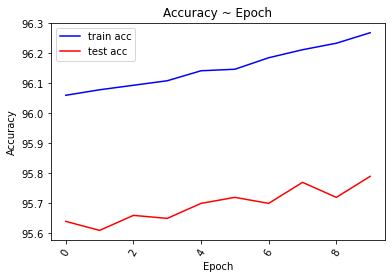

learning rate: 0.1
Epoch [1/10], Step [100/600], Loss: 0.1465
Epoch [1/10], Step [200/600], Loss: 0.1178
Epoch [1/10], Step [300/600], Loss: 0.1298
Epoch [1/10], Step [400/600], Loss: 0.0580
Epoch [1/10], Step [500/600], Loss: 0.1282
Epoch [1/10], Step [600/600], Loss: 0.1563
Accuracy of the network on the 10000 test images: 95.91 %
Accuracy of the network on the training images: 96.42 %
Epoch [2/10], Step [100/600], Loss: 0.1145
Epoch [2/10], Step [200/600], Loss: 0.1494
Epoch [2/10], Step [300/600], Loss: 0.0711
Epoch [2/10], Step [400/600], Loss: 0.0956
Epoch [2/10], Step [500/600], Loss: 0.0971
Epoch [2/10], Step [600/600], Loss: 0.1194
Accuracy of the network on the 10000 test images: 95.94 %
Accuracy of the network on the training images: 96.63 %
Epoch [3/10], Step [100/600], Loss: 0.0726
Epoch [3/10], Step [200/600], Loss: 0.2221
Epoch [3/10], Step [300/600], Loss: 0.1229
Epoch [3/10], Step [400/600], Loss: 0.0638
Epoch [3/10], Step [500/600], Loss: 0.0690
Epoch [3/10], Step [60

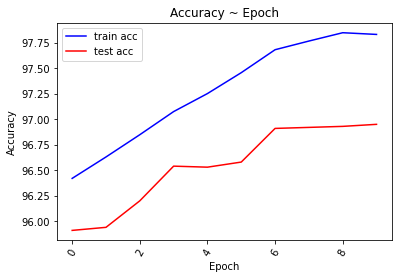

learning rate: 1
Epoch [1/10], Step [100/600], Loss: 0.2249
Epoch [1/10], Step [200/600], Loss: 0.1577
Epoch [1/10], Step [300/600], Loss: 0.1417
Epoch [1/10], Step [400/600], Loss: 0.1350
Epoch [1/10], Step [500/600], Loss: 0.1357
Epoch [1/10], Step [600/600], Loss: 0.0649
Accuracy of the network on the 10000 test images: 96.76 %
Accuracy of the network on the training images: 97.375 %
Epoch [2/10], Step [100/600], Loss: 0.0837
Epoch [2/10], Step [200/600], Loss: 0.0376
Epoch [2/10], Step [300/600], Loss: 0.0497
Epoch [2/10], Step [400/600], Loss: 0.0395
Epoch [2/10], Step [500/600], Loss: 0.1176
Epoch [2/10], Step [600/600], Loss: 0.0641
Accuracy of the network on the 10000 test images: 97.25 %
Accuracy of the network on the training images: 98.07333333333334 %
Epoch [3/10], Step [100/600], Loss: 0.0441
Epoch [3/10], Step [200/600], Loss: 0.0849
Epoch [3/10], Step [300/600], Loss: 0.1034
Epoch [3/10], Step [400/600], Loss: 0.0831
Epoch [3/10], Step [500/600], Loss: 0.0335
Epoch [3/10

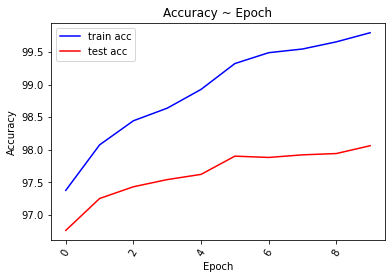

In [19]:
# Your code goes here
optimizer = torch.optim.SGD(nn2.parameters(), lr=0.0001, weight_decay=0.00001) 
train(nn2, optimizer, "learning rate: 0.0001")
optimizer = torch.optim.SGD(nn2.parameters(), lr=0.001, weight_decay=0.00001) 
train(nn2, optimizer, "learning rate: 0.001")
optimizer = torch.optim.SGD(nn2.parameters(), lr=0.01, weight_decay=0.00001) 
train(nn2, optimizer, "learning rate: 0.01")
optimizer = torch.optim.SGD(nn2.parameters(), lr=0.1, weight_decay=0.00001) 
train(nn2, optimizer, "learning rate: 0.1")
optimizer = torch.optim.SGD(nn2.parameters(), lr=1, weight_decay=0.00001) 
train(nn2, optimizer, "learning rate: 1")


## 5. (To finish, 3 pts each setting, 15 pts in total) Use Adam to train your two-hidden-layer network with different learning rate values in the range of $\{ 0.0001, 0.001, 0.01, 0.1, 1 \}$, and show which learning rate achieves the best testing accuracy.

learning rate: 0.0001
Epoch [1/10], Step [100/600], Loss: 0.0043
Epoch [1/10], Step [200/600], Loss: 0.0044
Epoch [1/10], Step [300/600], Loss: 0.0121
Epoch [1/10], Step [400/600], Loss: 0.0133
Epoch [1/10], Step [500/600], Loss: 0.0031
Epoch [1/10], Step [600/600], Loss: 0.0022
Accuracy of the network on the 10000 test images: 98.34 %
Accuracy of the network on the training images: 99.965 %
Epoch [2/10], Step [100/600], Loss: 0.0019
Epoch [2/10], Step [200/600], Loss: 0.0015
Epoch [2/10], Step [300/600], Loss: 0.0010
Epoch [2/10], Step [400/600], Loss: 0.0033
Epoch [2/10], Step [500/600], Loss: 0.0047
Epoch [2/10], Step [600/600], Loss: 0.0028
Accuracy of the network on the 10000 test images: 98.25 %
Accuracy of the network on the training images: 99.98 %
Epoch [3/10], Step [100/600], Loss: 0.0029
Epoch [3/10], Step [200/600], Loss: 0.0011
Epoch [3/10], Step [300/600], Loss: 0.0014
Epoch [3/10], Step [400/600], Loss: 0.0028
Epoch [3/10], Step [500/600], Loss: 0.0014
Epoch [3/10], Step

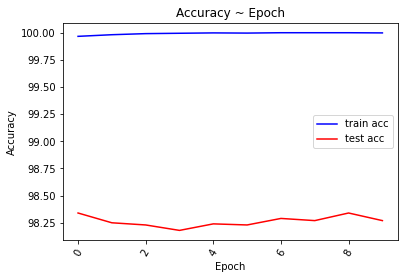

learning rate: 0.001
Epoch [1/10], Step [100/600], Loss: 0.0076
Epoch [1/10], Step [200/600], Loss: 0.0032
Epoch [1/10], Step [300/600], Loss: 0.0145
Epoch [1/10], Step [400/600], Loss: 0.0171
Epoch [1/10], Step [500/600], Loss: 0.0264
Epoch [1/10], Step [600/600], Loss: 0.0295
Accuracy of the network on the 10000 test images: 97.46 %
Accuracy of the network on the training images: 99.20333333333333 %
Epoch [2/10], Step [100/600], Loss: 0.0063
Epoch [2/10], Step [200/600], Loss: 0.0055
Epoch [2/10], Step [300/600], Loss: 0.0256
Epoch [2/10], Step [400/600], Loss: 0.0027
Epoch [2/10], Step [500/600], Loss: 0.0136
Epoch [2/10], Step [600/600], Loss: 0.0057
Accuracy of the network on the 10000 test images: 97.89 %
Accuracy of the network on the training images: 99.48 %
Epoch [3/10], Step [100/600], Loss: 0.0009
Epoch [3/10], Step [200/600], Loss: 0.0061
Epoch [3/10], Step [300/600], Loss: 0.0051
Epoch [3/10], Step [400/600], Loss: 0.0023
Epoch [3/10], Step [500/600], Loss: 0.0053
Epoch [3

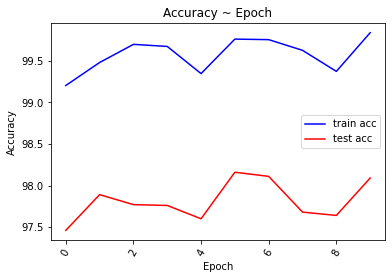

learning rate: 0.01
Epoch [1/10], Step [100/600], Loss: 0.1386
Epoch [1/10], Step [200/600], Loss: 0.0848
Epoch [1/10], Step [300/600], Loss: 0.0798
Epoch [1/10], Step [400/600], Loss: 0.1760
Epoch [1/10], Step [500/600], Loss: 0.1209
Epoch [1/10], Step [600/600], Loss: 0.1096
Accuracy of the network on the 10000 test images: 96.15 %
Accuracy of the network on the training images: 97.09333333333333 %
Epoch [2/10], Step [100/600], Loss: 0.1056
Epoch [2/10], Step [200/600], Loss: 0.0845
Epoch [2/10], Step [300/600], Loss: 0.1440
Epoch [2/10], Step [400/600], Loss: 0.0594
Epoch [2/10], Step [500/600], Loss: 0.1803
Epoch [2/10], Step [600/600], Loss: 0.0964
Accuracy of the network on the 10000 test images: 95.32 %
Accuracy of the network on the training images: 96.015 %
Epoch [3/10], Step [100/600], Loss: 0.1079
Epoch [3/10], Step [200/600], Loss: 0.0310
Epoch [3/10], Step [300/600], Loss: 0.0599
Epoch [3/10], Step [400/600], Loss: 0.0386
Epoch [3/10], Step [500/600], Loss: 0.0642
Epoch [3

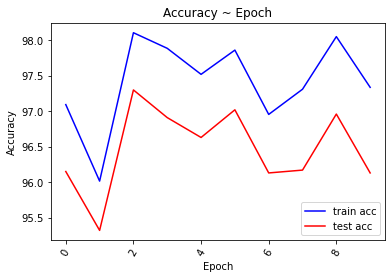

learning rate: 0.1
Epoch [1/10], Step [100/600], Loss: 1.0882
Epoch [1/10], Step [200/600], Loss: 1.7164
Epoch [1/10], Step [300/600], Loss: 1.5927
Epoch [1/10], Step [400/600], Loss: 5.8655
Epoch [1/10], Step [500/600], Loss: 2.6021
Epoch [1/10], Step [600/600], Loss: 0.9857
Accuracy of the network on the 10000 test images: 69.32 %
Accuracy of the network on the training images: 68.61833333333334 %
Epoch [2/10], Step [100/600], Loss: 3.3639
Epoch [2/10], Step [200/600], Loss: 2.5543
Epoch [2/10], Step [300/600], Loss: 2.5807
Epoch [2/10], Step [400/600], Loss: 1.6281
Epoch [2/10], Step [500/600], Loss: 2.3101
Epoch [2/10], Step [600/600], Loss: 5.1713
Accuracy of the network on the 10000 test images: 21.32 %
Accuracy of the network on the training images: 22.183333333333334 %
Epoch [3/10], Step [100/600], Loss: 4.6564
Epoch [3/10], Step [200/600], Loss: 6.6597
Epoch [3/10], Step [300/600], Loss: 2.8175
Epoch [3/10], Step [400/600], Loss: 5.0100
Epoch [3/10], Step [500/600], Loss: 7.99

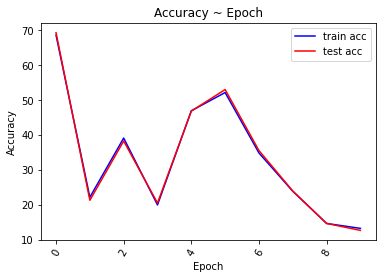

learning rate: 1
Epoch [1/10], Step [100/600], Loss: 120.8332
Epoch [1/10], Step [200/600], Loss: 167.6127
Epoch [1/10], Step [300/600], Loss: 160.0100
Epoch [1/10], Step [400/600], Loss: 91.2292
Epoch [1/10], Step [500/600], Loss: 104.5695
Epoch [1/10], Step [600/600], Loss: 163.5998
Accuracy of the network on the 10000 test images: 10.1 %
Accuracy of the network on the training images: 10.218333333333334 %
Epoch [2/10], Step [100/600], Loss: 87.8348
Epoch [2/10], Step [200/600], Loss: 159.5301
Epoch [2/10], Step [300/600], Loss: 89.5867
Epoch [2/10], Step [400/600], Loss: 199.6514
Epoch [2/10], Step [500/600], Loss: 115.1015
Epoch [2/10], Step [600/600], Loss: 149.7748
Accuracy of the network on the 10000 test images: 9.58 %
Accuracy of the network on the training images: 9.863333333333333 %
Epoch [3/10], Step [100/600], Loss: 128.9803
Epoch [3/10], Step [200/600], Loss: 90.1835
Epoch [3/10], Step [300/600], Loss: 146.1976
Epoch [3/10], Step [400/600], Loss: 157.2162
Epoch [3/10], St

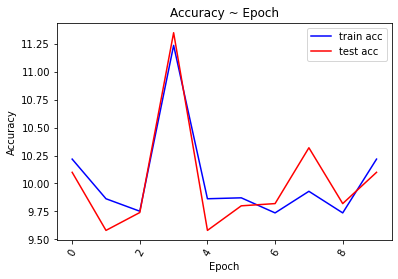

In [20]:
# Your code goes here
optimizer = torch.optim.Adam(nn2.parameters(), lr=0.0001, weight_decay=0.00001) 
train(nn2, optimizer, "learning rate: 0.0001")
optimizer = torch.optim.Adam(nn2.parameters(), lr=0.001, weight_decay=0.00001) 
train(nn2, optimizer, "learning rate: 0.001")
optimizer = torch.optim.Adam(nn2.parameters(), lr=0.01, weight_decay=0.00001) 
train(nn2, optimizer, "learning rate: 0.01")
optimizer = torch.optim.Adam(nn2.parameters(), lr=0.1, weight_decay=0.00001) 
train(nn2, optimizer, "learning rate: 0.1")
optimizer = torch.optim.Adam(nn2.parameters(), lr=1, weight_decay=0.00001) 
train(nn2, optimizer, "learning rate: 1")

## 6. (To finish, 3 pts each setting, 9 pts in total) Change the dimension of the hidden variable (*hidden_size*) from $500$ to $100, 1000, 2000$, train the corresponding networks, and show the difference of them in testing accuracy.

Hint: you may use exactly the same setting with the above section 1, e.g., still use Adam with original setting for optimization

hidden_size: 100
Epoch [1/10], Step [100/600], Loss: 0.3359
Epoch [1/10], Step [200/600], Loss: 0.3446
Epoch [1/10], Step [300/600], Loss: 0.2342
Epoch [1/10], Step [400/600], Loss: 0.2774
Epoch [1/10], Step [500/600], Loss: 0.3100
Epoch [1/10], Step [600/600], Loss: 0.2669
Accuracy of the network on the 10000 test images: 93.82 %
Accuracy of the network on the training images: 94.06666666666666 %
Epoch [2/10], Step [100/600], Loss: 0.2011
Epoch [2/10], Step [200/600], Loss: 0.2046
Epoch [2/10], Step [300/600], Loss: 0.2087
Epoch [2/10], Step [400/600], Loss: 0.2031
Epoch [2/10], Step [500/600], Loss: 0.2323
Epoch [2/10], Step [600/600], Loss: 0.1103
Accuracy of the network on the 10000 test images: 95.56 %
Accuracy of the network on the training images: 95.89 %
Epoch [3/10], Step [100/600], Loss: 0.1262
Epoch [3/10], Step [200/600], Loss: 0.0762
Epoch [3/10], Step [300/600], Loss: 0.1697
Epoch [3/10], Step [400/600], Loss: 0.1258
Epoch [3/10], Step [500/600], Loss: 0.1082
Epoch [3/10]

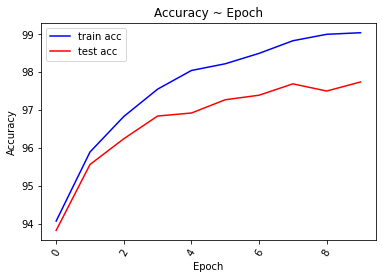

hidden_size: 1000
Epoch [1/10], Step [100/600], Loss: 0.3056
Epoch [1/10], Step [200/600], Loss: 0.1444
Epoch [1/10], Step [300/600], Loss: 0.2213
Epoch [1/10], Step [400/600], Loss: 0.0915
Epoch [1/10], Step [500/600], Loss: 0.1080
Epoch [1/10], Step [600/600], Loss: 0.1050
Accuracy of the network on the 10000 test images: 96.42 %
Accuracy of the network on the training images: 96.54 %
Epoch [2/10], Step [100/600], Loss: 0.0384
Epoch [2/10], Step [200/600], Loss: 0.1606
Epoch [2/10], Step [300/600], Loss: 0.1461
Epoch [2/10], Step [400/600], Loss: 0.0857
Epoch [2/10], Step [500/600], Loss: 0.0571
Epoch [2/10], Step [600/600], Loss: 0.0500
Accuracy of the network on the 10000 test images: 97.32 %
Accuracy of the network on the training images: 98.115 %
Epoch [3/10], Step [100/600], Loss: 0.0368
Epoch [3/10], Step [200/600], Loss: 0.0281
Epoch [3/10], Step [300/600], Loss: 0.0603
Epoch [3/10], Step [400/600], Loss: 0.1100
Epoch [3/10], Step [500/600], Loss: 0.0342
Epoch [3/10], Step [60

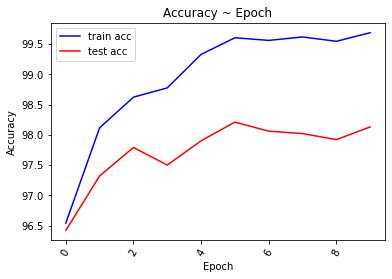

hidden_size: 2000
Epoch [1/10], Step [100/600], Loss: 0.2380
Epoch [1/10], Step [200/600], Loss: 0.1623
Epoch [1/10], Step [300/600], Loss: 0.1125
Epoch [1/10], Step [400/600], Loss: 0.1500
Epoch [1/10], Step [500/600], Loss: 0.2905
Epoch [1/10], Step [600/600], Loss: 0.1247
Accuracy of the network on the 10000 test images: 96.31 %
Accuracy of the network on the training images: 96.99166666666666 %
Epoch [2/10], Step [100/600], Loss: 0.0688
Epoch [2/10], Step [200/600], Loss: 0.1478
Epoch [2/10], Step [300/600], Loss: 0.0677
Epoch [2/10], Step [400/600], Loss: 0.0649
Epoch [2/10], Step [500/600], Loss: 0.0459
Epoch [2/10], Step [600/600], Loss: 0.0193
Accuracy of the network on the 10000 test images: 97.52 %
Accuracy of the network on the training images: 98.24 %
Epoch [3/10], Step [100/600], Loss: 0.0295
Epoch [3/10], Step [200/600], Loss: 0.0382
Epoch [3/10], Step [300/600], Loss: 0.0205
Epoch [3/10], Step [400/600], Loss: 0.0241
Epoch [3/10], Step [500/600], Loss: 0.1032
Epoch [3/10

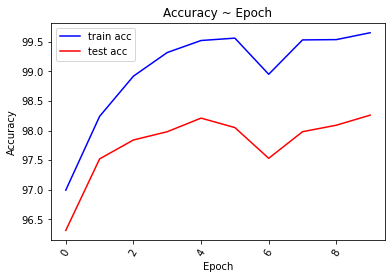

In [25]:
# Your code goes here

model = NeuralNet(input_size, 100, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.00001) 
train(model, optimizer, "hidden_size: 100")

model = NeuralNet(input_size, 1000, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.00001) 
train(model, optimizer, "hidden_size: 1000")

model = NeuralNet(input_size, 2000, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.00001) 
train(model, optimizer, "hidden_size: 2000")

## 7. (To finish, 3 pts each question, 9 pts in total) Answer the following three questions

### Q1 (3 pts): Is the best learning rate for SGD the same with the best learning rate for Adam?

**Answer**:



### Q2 (3 pts): Read [this discussion](https://discuss.pytorch.org/t/how-does-sgd-weight-decay-work/33105/2) for the hyper-parameter of "weight decay" in optimizer and briefly describe how it works (hint: try to link it to anything we have learned in our class, such as the section of ML basic)

**Answer**:



### Q3 (3 pts): In the above section 6, how the dimension of hidden variable impacts the performance?

**Answer**:

